#### Imports

In [0]:
!ls

MURA-v1.1  sample_data


In [0]:
# -*- coding: utf-8 -*-
#!wget -c https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip
#!unzip MURA-v1.1.zip
#!rm MURA-v1.1.zip
!ls

In [0]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import keras
pd.options.display.max_colwidth = 100
from keras.applications.mobilenetv2 import MobileNetV2
from keras.applications.densenet import DenseNet169
from keras.preprocessing import image
from keras.applications.mobilenetv2 import preprocess_input
from keras.applications import MobileNet
from keras.callbacks import (EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard)
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.metrics import binary_accuracy, binary_crossentropy
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenetv2 import MobileNetV2
from keras.preprocessing import image as k_im_prep
from keras.models import Model
from keras import backend as K
from keras.models import Sequential

#### Training Data

**output is list of paths to images and list of corresponding labels**

In [0]:
#did this because it gave an error at sample  5307 or near it if took all
samples=5307

**TODO: handle that unread sample problem**
If couldn't handle it then see how many labels are +ve and how are -ve to have intuition about model results , maybe because too many samples of one class and little of other

In [0]:
#make dataframe
studies=pd.read_csv('MURA-v1.1/train_labeled_studies.csv', sep=',',header=None)
#making a list of paths and a corresponding list of labels
#using non vectorized for speed
#wrist studies
wrist_tr=studies[studies[0].str.contains("WRIST")==True]
wrist_tr=np.array(wrist_tr)

#making a list of paths and a corresponding list of labels
#using non vectorized for speed
wrist_paths_tr=[]
wrist_labels_tr=[]
for i in tqdm( range(wrist_tr.shape[0]) ):
    study_path=wrist_tr[i][0]
    study_label=wrist_tr[i][1]
    study_files = [f for f in listdir(study_path) if isfile(join(study_path, f))]
    for image in study_files:
        wrist_paths_tr.append(study_path + image)
        wrist_labels_tr.append(study_label)

wrist_paths_tr=np.array(wrist_paths_tr)
wrist_labels_tr=np.array(wrist_labels_tr)

print("\n",wrist_paths_tr.shape)
print(wrist_labels_tr.shape)


### Todo : issue , images after preprocessing look different

read images from paths to array of images

In [0]:
wrist_images_tr=[]
for path in tqdm(wrist_paths_tr[:samples]):
    wrist=k_im_prep.load_img(path, target_size=(224, 224))
    wrist_images_tr.append(np.array(wrist))
#making it a numpy array instead of python list
wrist_images_tr=np.array(wrist_images_tr)

wrist_labels_tr=wrist_labels_tr[:samples]
print(wrist_images_tr.shape)
print(wrist_labels_tr.shape)








 30%|███       | 1606/5307 [00:06<00:17, 211.06it/s]






 31%|███       | 1628/5307 [00:06<00:17, 212.75it/s]






 31%|███       | 1650/5307 [00:06<00:17, 213.52it/s]






 32%|███▏      | 1673/5307 [00:07<00:16, 215.68it/s]






 32%|███▏      | 1699/5307 [00:07<00:15, 226.53it/s]






 32%|███▏      | 1723/5307 [00:07<00:15, 226.94it/s]






 33%|███▎      | 1746/5307 [00:07<00:15, 226.63it/s]






 33%|███▎      | 1769/5307 [00:07<00:15, 227.23it/s]






 34%|███▍      | 1795/5307 [00:07<00:14, 234.62it/s]






 34%|███▍      | 1819/5307 [00:07<00:15, 227.16it/s]






 35%|███▍      | 1843/5307 [00:07<00:15, 228.64it/s]






 35%|███▌      | 1871/5307 [00:07<00:14, 241.93it/s]






 36%|███▌      | 1896/5307 [00:08<00:15, 225.59it/s]






 36%|███▌      | 1919/5307 [00:08<00:15, 224.74it/s]






 37%|███▋      | 1948/5307 [00:08<00:13, 240.95it/s]






 37%|███▋      | 1973/5307 [00:08<00:14, 234.74it/s]






 38%|███▊      | 2001/5307 [00:08<00:13, 246.66it

(5307, 224, 224, 3)
(5307,)


1


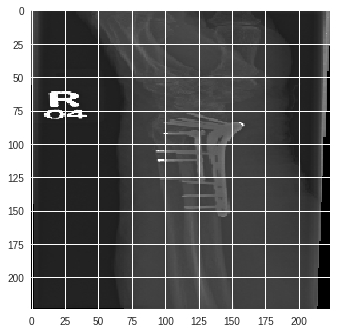

In [0]:
#visualizing random sample after preprocesiing 
index=999
plt.imshow(wrist_images_tr[index])
print(wrist_labels_tr[index])

#### Validation Data

In [0]:
#make dataframe
studies=pd.read_csv('MURA-v1.1/valid_labeled_studies.csv', sep=',',header=None)
#making a list of paths and a corresponding list of labels
#using non vectorized for speed
#wrist studies
wrist_val=studies[studies[0].str.contains("WRIST")==True]
wrist_val=np.array(wrist_val)

#making a list of paths and a corresponding list of labels
#using non vectorized for speed
wrist_paths_val=[]
wrist_labels_val=[]
for i in tqdm( range(wrist_val.shape[0]) ):
    study_path=wrist_val[i][0]
    study_label=wrist_val[i][1]
    study_files = [f for f in listdir(study_path) if isfile(join(study_path, f))]
    for image in study_files:
        wrist_paths_val.append(study_path + image)
        wrist_labels_val.append(study_label)

wrist_paths_val=np.array(wrist_paths_val)
wrist_labels_val=np.array(wrist_labels_val)

wrist_images_val=[]
for path in tqdm(wrist_paths_val):
    wrist=k_im_prep.load_img(path, target_size=(224, 224))
    wrist_images_val.append(np.array(wrist))

wrist_images_val=np.array(wrist_images_val)

print(wrist_images_val.shape)











  0%|          | 0/237 [00:00<?, ?it/s]






100%|██████████| 237/237 [00:00<00:00, 15040.40it/s]






  0%|          | 0/659 [00:00<?, ?it/s]






  4%|▍         | 25/659 [00:00<00:02, 248.73it/s]






  8%|▊         | 53/659 [00:00<00:02, 257.15it/s]






 11%|█         | 70/659 [00:00<00:02, 221.55it/s]






 14%|█▍        | 93/659 [00:00<00:02, 222.88it/s]






 17%|█▋        | 114/659 [00:00<00:02, 216.99it/s]






 20%|██        | 133/659 [00:00<00:02, 205.42it/s]






 23%|██▎       | 153/659 [00:00<00:02, 203.60it/s]






 27%|██▋       | 178/659 [00:00<00:02, 214.28it/s]






 32%|███▏      | 209/659 [00:00<00:01, 234.87it/s]






 35%|███▌      | 233/659 [00:01<00:01, 232.93it/s]






 39%|███▉      | 257/659 [00:01<00:01, 231.93it/s]






 43%|████▎     | 282/659 [00:01<00:01, 234.77it/s]






 46%|████▋     | 306/659 [00:01<00:01, 229.12it/s]






 50%|████▉     | 329/659 [00:01<00:01, 225.24it/s]






 53%|█████▎    | 352/659 [00:01<00:01, 205.47it/

(659, 224, 224, 3)


label=  0


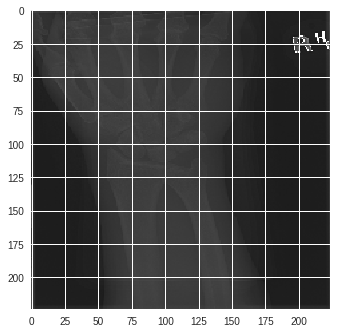

In [0]:
#visualizing random sample
index=650
plt.imshow(wrist_images_val[index])
print("label= ",wrist_labels_val[index])

In [0]:
#data bias : train
print("0 normal, 1 abnormal")
unique, counts = np.unique(wrist_labels_tr, return_counts=True)
print(dict(zip(unique, counts)))
#val
unique, counts = np.unique(wrist_labels_val, return_counts=True)
print(dict(zip(unique, counts)))


0 normal, 1 abnormal
{0: 1320, 1: 3987}
{0: 364, 1: 295}


### Model

#### TODO : see if want to freeze less layers

In [0]:
MobileNetV2_model = MobileNetV2(input_shape= (224, 224, 3),weights='imagenet', include_top=False)
for layer in MobileNetV2_model.layers:
  layer.trainable= False 
MobileNetV2_model.summary()

9412608/9406464 [==============================] - 0s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________

#### TODO
* could we add precision or recall metric ? change accuracy?
* why doesn't it work if removed GlobalAveragePooling line?
* 

In [0]:
# This returns a tensor
inputs = Input(shape=(224,224,3))

# a layer instance is callable on a tensor, and returns a tensor
x = MobileNetV2_model(inputs)
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(1, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               655872    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total para

In [0]:
model.fit(wrist_images_tr, wrist_labels_tr, epochs=5, validation_data=(wrist_images_val, wrist_labels_val), shuffle=True, verbose=1 )  # starts training
#TODO: add class_weight parameter dictionary of weights to each class index

Train on 5307 samples, validate on 659 samples
Epoch 1/5
5307/5307 [==============================] - 18s 3ms/step - loss: 3.9653 - acc: 0.7513 - val_loss: 8.8058 - val_acc: 0.4476
Epoch 2/5
5307/5307 [==============================] - 17s 3ms/step - loss: 3.9653 - acc: 0.7513 - val_loss: 8.8058 - val_acc: 0.4476
Epoch 3/5
5307/5307 [==============================] - 17s 3ms/step - loss: 3.9653 - acc: 0.7513 - val_loss: 8.8058 - val_acc: 0.4476
Epoch 4/5
5307/5307 [==============================] - 17s 3ms/step - loss: 3.9653 - acc: 0.7513 - val_loss: 8.8058 - val_acc: 0.4476
Epoch 5/5
5307/5307 [==============================] - 17s 3ms/step - loss: 3.9653 - acc: 0.7513 - val_loss: 8.8058 - val_acc: 0.4476


**Trying Densnet**

In [0]:
#initializing pretrained model
DenseNet169_model = DenseNet169(input_shape= (224, 224, 3),weights='imagenet', include_top=False)
#freeze layers of densenet
for layer in DenseNet169_model.layers:
  layer.trainable= False 
DenseNet169_model.summary()


51879936/51877672 [==============================] - 1s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________

In [0]:
#Bone Model

# This returns a tensor
inputs = Input(shape=(224,224,3))

# a layer instance is callable on a tensor, and returns a tensor
x = DenseNet169_model(inputs)
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(1, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
densenet169 (Model)          (None, 7, 7, 1664)        12642880  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1664)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               852480    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_25 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 33        
Total para

In [73]:
Y=keras.utils.to_categorical(wrist_labels_tr, num_classes=2)
model.fit(wrist_images_tr, Y , epochs=5, validation_data=(wrist_images_val, wrist_labels_val), shuffle=True, verbose=1 )  # starts training
#TODO: add class_weight parameter dictionary of weights to each class index

ValueError: ignored

**Inception code from Keras docs**
https://keras.io/applications/

In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='sigmoid')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False


In [84]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_565 (Conv2D)             (None, None, None, 3 864         input_16[0][0]                   
__________________________________________________________________________________________________
batch_normalization_565 (BatchN (None, None, None, 3 96          conv2d_565[0][0]                 
__________________________________________________________________________________________________
activation_565 (Activation)     (None, None, None, 3 0           batch_normalization_565[0][0]    
__________________________________________________________________________________________________
conv2d_566

In [87]:

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['binary_accuracy'])
#Y=keras.utils.to_categorical(wrist_labels_tr, num_classes=2)
# train the model on the new data for a few epochs
model.fit(wrist_images_tr, wrist_labels_tr, epochs=5, validation_data=(wrist_images_val, wrist_labels_val), shuffle=True, verbose=1 )


Train on 5307 samples, validate on 659 samples
Epoch 1/5
5307/5307 [==============================] - 92s 17ms/step - loss: 0.5724 - binary_accuracy: 0.7549 - val_loss: 7.3381 - val_binary_accuracy: 0.4476
Epoch 2/5
5307/5307 [==============================] - 36s 7ms/step - loss: 0.4454 - binary_accuracy: 0.8127 - val_loss: 7.3308 - val_binary_accuracy: 0.4568
Epoch 3/5
5307/5307 [==============================] - 36s 7ms/step - loss: 0.4011 - binary_accuracy: 0.8315 - val_loss: 7.7553 - val_binary_accuracy: 0.4583
Epoch 4/5
5307/5307 [==============================] - 36s 7ms/step - loss: 0.3944 - binary_accuracy: 0.8321 - val_loss: 7.6381 - val_binary_accuracy: 0.4552
Epoch 5/5
5307/5307 [==============================] - 35s 7ms/step - loss: 0.3734 - binary_accuracy: 0.8393 - val_loss: 4.6379 - val_binary_accuracy: 0.4431


In [77]:
print(Y.shape)

(5307, 2)


In [0]:
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='binary_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(wrist_images_tr, wrist_labels_tr, epochs=5, validation_data=(wrist_images_val, wrist_labels_val), shuffle=True, verbose=1 )

0 input_17
1 conv2d_659
2 batch_normalization_659
3 activation_659
4 conv2d_660
5 batch_normalization_660
6 activation_660
7 conv2d_661
8 batch_normalization_661
9 activation_661
10 max_pooling2d_29
11 conv2d_662
12 batch_normalization_662
13 activation_662
14 conv2d_663
15 batch_normalization_663
16 activation_663
17 max_pooling2d_30
18 conv2d_667
19 batch_normalization_667
20 activation_667
21 conv2d_665
22 conv2d_668
23 batch_normalization_665
24 batch_normalization_668
25 activation_665
26 activation_668
27 average_pooling2d_64
28 conv2d_664
29 conv2d_666
30 conv2d_669
31 conv2d_670
32 batch_normalization_664
33 batch_normalization_666
34 batch_normalization_669
35 batch_normalization_670
36 activation_664
37 activation_666
38 activation_669
39 activation_670
40 mixed0
41 conv2d_674
42 batch_normalization_674
43 activation_674
44 conv2d_672
45 conv2d_675
46 batch_normalization_672
47 batch_normalization_675
48 activation_672
49 activation_675
50 average_pooling2d_65
51 conv2d_671
5

In [88]:
loss,accuracy=model.evaluate(x=wrist_images_tr, y=wrist_labels_tr, batch_size=128, verbose=1)
print("train loss",loss,"train accuracy",accuracy)

5307/5307 [==============================] - 28s 5ms/step
train loss 5.327484844632577 train accuracy 0.3766723196003786


In [89]:
loss,accuracy=model.evaluate(x=wrist_images_val, y=wrist_labels_val, batch_size=128, verbose=1)
print("validation loss",loss,"validation accuracy",accuracy)

659/659 [==============================] - 4s 5ms/step
validation loss 4.637948667876456 validation accuracy 0.44309559975480817


#### Current point: now generalizing wrist model to all wrist data and moving to colab + seeing early stopping callback

All unsolved problems:
* why is it in every epoch the result is the same, all results exactly the same
* which layers to freeze and which to train + should I train TL before freezing it ?
* data augmentation to generate more data
* recording variation in accuracy after every change to get intuition
* no matter Mobilenet,densenet, added or removed denses same results !! exact same even fractions
* the fear of overfitting over validation set
* what does outputted loss represent ? how to read the number ?
* Get more training data through solving the reading problem and getting the remaining 4k images
* normalization step and its effect on accuracy
* should I use 1 or two neurons at output layer ?